<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


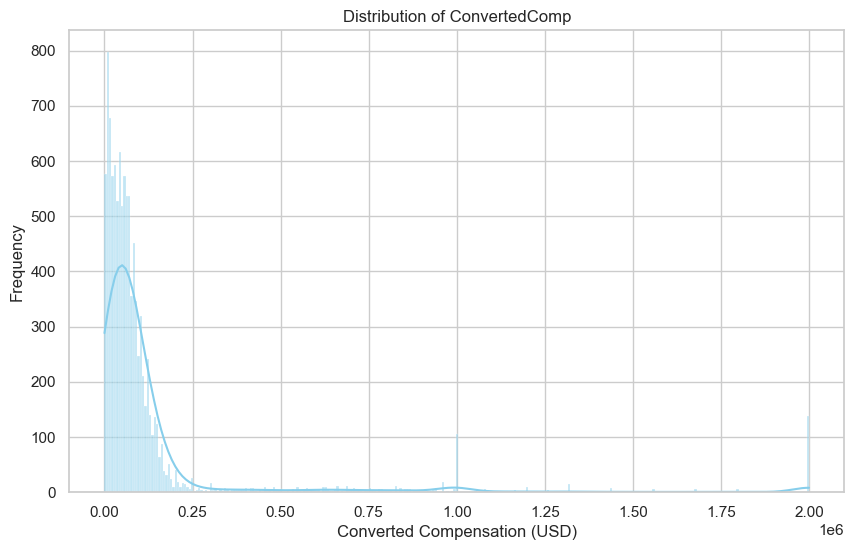

In [3]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], kde=True, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


Plot the histogram for the column `ConvertedComp`.


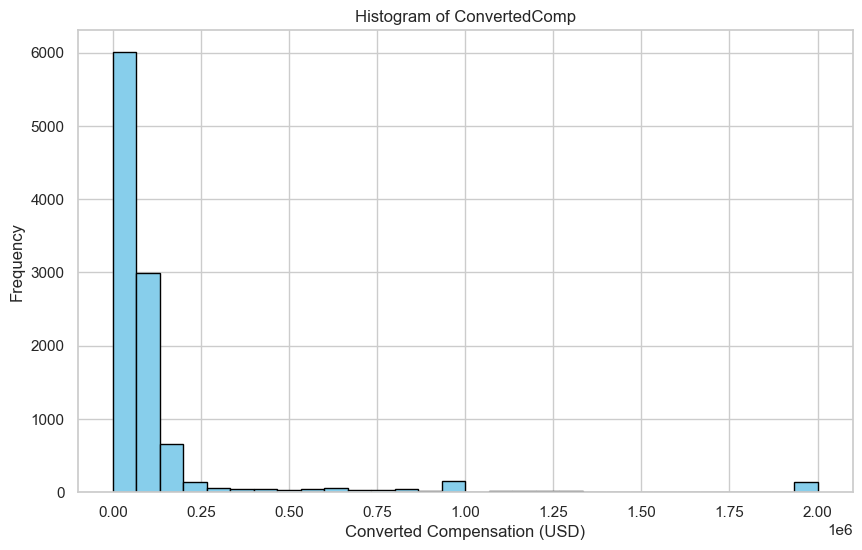

In [4]:
# your code goes here
import matplotlib.pyplot as plt

# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [5]:
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

print(f"The median of the 'ConvertedComp' column is: {median_converted_comp}")


The median of the 'ConvertedComp' column is: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
# Filter the DataFrame to include only rows where Gender is 'Man'
male_responders = df[df['Gender'] == 'Man']

# Count the number of rows in the filtered DataFrame
num_male_responders = len(male_responders)

print(f"The number of responders who identified themselves only as a Man is: {num_male_responders}")

The number of responders who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
# Filter the DataFrame to include only rows where Gender is 'Woman'
female_responders = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for the filtered rows
median_converted_comp_female = female_responders['ConvertedComp'].median()

print(f"The median ConvertedComp of responders identified themselves only as a Woman is: {median_converted_comp_female}")

The median ConvertedComp of responders identified themselves only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
# Calculate the five-number summary for the 'Age' column
five_num_summary_age = df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]

print("Five-number summary for the column 'Age':")
print(five_num_summary_age)

Five-number summary for the column 'Age':
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


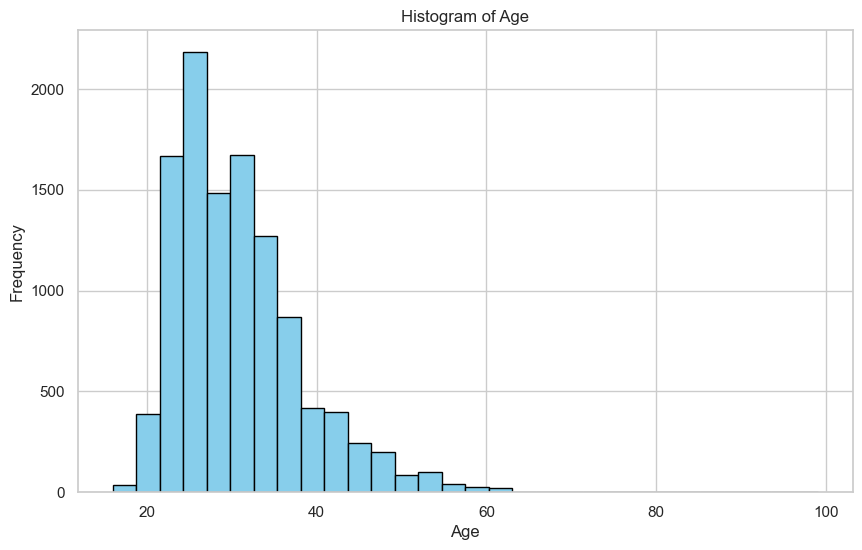

In [9]:
# your code goes here
# Plot the histogram for the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


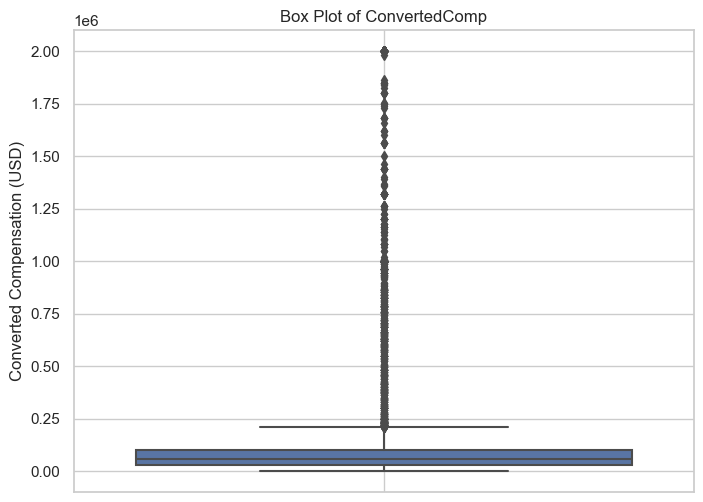

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot a box plot for the 'ConvertedComp' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.ylabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here
# Calculate the Interquartile Range (IQR) for the 'ConvertedComp' column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(f"The Interquartile Range (IQR) for the 'ConvertedComp' column is: {IQR}")

The Interquartile Range (IQR) for the 'ConvertedComp' column is: 73132.0


Find out the upper and lower bounds.


In [15]:
# your code goes here
# Calculate the upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(f"The upper bound for potential outliers is: {upper_bound}")
print(f"The lower bound for potential outliers is: {lower_bound}")

The upper bound for potential outliers is: 209698.0
The lower bound for potential outliers is: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
# Count the number of outliers
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]
num_outliers = len(outliers)

print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")

The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
# Filter the original DataFrame to remove outliers from the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the first few rows of the new DataFrame
df_no_outliers.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation between 'Age' and all other numeric columns
correlation_age = df[numeric_columns].corrwith(df['Age'])

# Display the correlation values
print("Correlation between Age and all other numerical columns:")
print(correlation_age)

Correlation between Age and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


In [21]:
df_no_outliers['ConvertedComp'].median()

52704.0

In [22]:
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
